# CATS VS DOGS DEEP LEARNING MODEL

In [27]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

## VERİ SETİNİN HAZIRLANMASI

In [28]:
base_dir="cats_and_dogs_filtered"

train_dir=os.path.join(base_dir,"train")
validation_dir=os.path.join(base_dir,"validation")
test_dir=os.path.join(base_dir,"test")

train_cats_dir=os.path.join(train_dir,"cats")
train_dogs_dir=os.path.join(train_dir,"dogs")

validation_cats_dir = os.path.join(validation_dir,"cats")
validation_dogs_dir = os.path.join(validation_dir,"dogs")

test_cats_dir=os.path.join(test_dir,"cats")
test_dogs_dir=os.path.join(test_dir,"dogs")

In [29]:
print("Toplam eğitim için kedi resimleri sayısı      :",len(os.listdir(train_cats_dir)))
print("Toplam eğitim için köpek resimleri sayısı     :",len(os.listdir(train_dogs_dir)))

print("Toplam validasyon için kedi resimleri sayısı  :",len(os.listdir(validation_cats_dir)))
print("Toplam validasyon için köpek resimleri sayısı :",len(os.listdir(validation_dogs_dir)))

print("Toplam test için kedi resimleri sayısı        :",len(os.listdir(test_cats_dir)))
print("Toplam test için köpek resimleri sayısı       :",len(os.listdir(test_dogs_dir)))

Toplam eğitim için kedi resimleri sayısı      : 1000
Toplam eğitim için köpek resimleri sayısı     : 1000
Toplam validasyon için kedi resimleri sayısı  : 500
Toplam validasyon için köpek resimleri sayısı : 500
Toplam test için kedi resimleri sayısı        : 100
Toplam test için köpek resimleri sayısı       : 100


## MODELİN OLUŞTURULMASI 

In [94]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(224,224,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [95]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 222, 222, 16)      160       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 24, 24, 128)      

In [96]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

## VERİLERİN DÜZENLENMESİ (VERİ ÖNİŞLEME) 

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    color_mode='grayscale',
                                                    target_size=(224, 224))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         color_mode='grayscale',
                                                         target_size = (224, 224))

test_generator =  test_datagen.flow_from_directory( test_dir,
                                                    batch_size=20,
                                                    class_mode  = 'binary',
                                                    color_mode='grayscale',
                                                    target_size = (224, 224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


## MODELİN EĞİTLİMESİ 

In [100]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=20,
                    validation_steps=50,
                    verbose=1)

Epoch 1/20
100/100 [==============================] - 45s 448ms/step - loss: 0.8551 - acc: 0.5175 - val_loss: 0.6853 - val_acc: 0.5920
Epoch 2/20
100/100 [==============================] - 41s 410ms/step - loss: 0.6834 - acc: 0.5945 - val_loss: 0.7880 - val_acc: 0.5030
Epoch 3/20
100/100 [==============================] - 39s 395ms/step - loss: 0.6426 - acc: 0.6455 - val_loss: 0.6767 - val_acc: 0.6050
Epoch 4/20
100/100 [==============================] - 39s 394ms/step - loss: 0.5659 - acc: 0.7040 - val_loss: 0.6361 - val_acc: 0.6380
Epoch 5/20
100/100 [==============================] - 40s 396ms/step - loss: 0.4916 - acc: 0.7685 - val_loss: 0.5512 - val_acc: 0.7350
Epoch 6/20
100/100 [==============================] - 40s 396ms/step - loss: 0.4009 - acc: 0.8170 - val_loss: 0.6098 - val_acc: 0.7440
Epoch 7/20
100/100 [==============================] - 40s 395ms/step - loss: 0.3350 - acc: 0.8585 - val_loss: 0.5975 - val_acc: 0.7300
Epoch 8/20
100/100 [==============================] - 4

## MODELİN KAYIT EDİLEMSİ

In [101]:
model.save('my_model2.model')

In [31]:
my_model=tf.keras.models.load_model('my_model2.model')

## MODELİN TEST EDİLMESİ 

In [32]:
results = my_model.evaluate(test_generator, verbose=0)

print("Test Loss    : {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss    : 2.67632
Test Accuracy: 75.00%


## SONUÇLAR 

Text(0.5, 1.0, 'Training and validation loss')

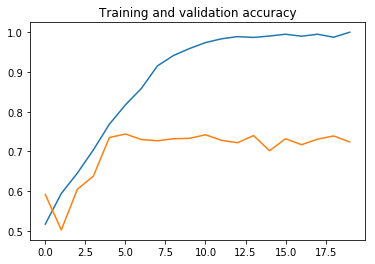

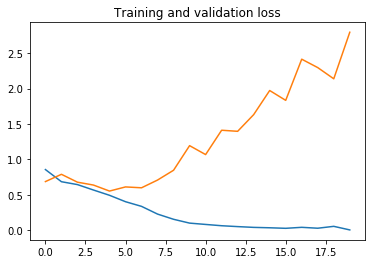

In [121]:
acc      = history.history[ 'acc']
val_acc  = history.history[ 'val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc))

plt.plot  (epochs,acc)
plt.plot  (epochs,val_acc)
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs, loss)
plt.plot  ( epochs, val_loss)
plt.title ('Training and validation loss')

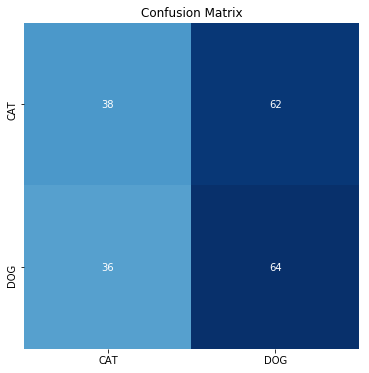

Classification Report:
----------------------
               precision    recall  f1-score   support

         CAT       0.51      0.38      0.44       100
         DOG       0.51      0.64      0.57       100

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200



In [39]:
predictions = (my_model.predict(test_generator) >= 0.5).astype(np.int)

cm = confusion_matrix(test_generator.labels, predictions, labels=[0, 1])
clr = classification_report(test_generator.labels, predictions, labels=[0, 1], target_names=["CAT", "DOG"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.yticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

## MODELİN ELDEKİ VERİLER İLE TEST EDİLMESİ

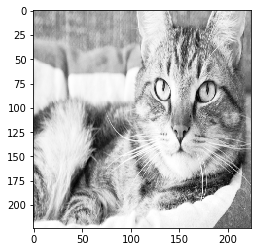

Cat


In [25]:
file="cat.jpg"
image = cv.imread(file,cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (224,224))
image = 255-image
image = image.reshape(1, 224, 224, 1) #RGB -1 224 224 3

plt.imshow(image.reshape(224, 224),cmap="Greys")
plt.show()
pred = my_model.predict(image.reshape(-1, 224, 224,1), batch_size=1)

if pred[0] == 1:
    print("Dog")
else:
    print("Cat")



In [33]:
#Egemen Kılıç